## Introduction

Import required libraries

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Provide the path to the file containing the data

In [2]:
path_to_csv = "data/abalone.csv"

Load the data into pandas. The data contains the following

| <p align="left">Name</p>           | <p align="left">Units</p>   | <p align="left">Description</p>      |
|:-----------------------------------|:-------:|:---------------------------------------------------------|
| <p align="left">Sex</p>            |         | <p align="left">M (male), F (female), and I (infant)</p> |
| <p align="left">Length</p>         | mm      | <p align="left">Longest shell measurement</p>            |
| <p align="left">Diameter</p>       | mm      | <p align="left">Perpendicular to length</p>              |
| <p align="left">Height</p>         | mm      | <p align="left">With meat in shell</p>                   |
| <p align="left">Whole Weight</p>   | grams   | <p align="left">Whole abalone</p>                        |
| <p align="left">Shucked weight</p> | grams   | <p align="left">Weight of meat</p>                       |
| <p align="left">Viscera weight</p> | grams   | <p align="left">Gut weight (after bleeding)</p>          |
| <p align="left">Shell weight</p>   | grams   | <p align="left">After being dried</p>                    |
| <p align="left">Rings</p>          |         | <p align="left">+1.5 gives the age in years</p>          |

In [3]:
df = pd.read_csv(path_to_csv, header=None, names = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"])

Lets take a look at the data

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Missing Data

Lets do a search for missing data. We can do this easily with pandas using the code below.

In [5]:
nans = df[df.isnull().any(axis=1)]
nans

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
878,F,0.635,0.485,0.165,1.2945,0.6680,NaN,0.2715,9
1888,F,0.565,0.445,0.125,0.8305,0.3135,0.1785,0.2300,NaN
3093,NaN,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.2350,11


As can be seen from the results of our search we have 3 NaN rows. 

- Row 878 has an invalid Viscera weight
- row 1888 has an invalid Rings value 
- row 3093 has an invalid Sex value

We can now drop the indexes that are invalid from our dataframe. Before we do that lets display the size of our data frame before and after to confirm that the 3 rows were dropped

In [6]:
df.shape

(4177, 9)

In [7]:
df.drop(df.index[df.isnull().any(axis=1)], inplace=True)

We have now dropped the indexes, lets see if the dataframe has reduced by 3

In [8]:
df.shape

(4174, 9)

We can see above that the row length has reduced from 4177 to 4174. This is a difference of exactly 3 rows.

Lets check all our column types are correct

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings              object
dtype: object

Rings seems to have been assigned the wrong datatype. We can convery it to an object using the code below

In [10]:
df['Rings'] = pd.to_numeric(df['Rings'], errors='coerce')
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings             float64
dtype: object

### Erroneous Data

Lets first check for zero value numbers. It would be impossible for example to have zero length or height

In [11]:
df[(df.select_dtypes(include=['number']) <= 0).any(1)]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.000,0.4280,0.2065,0.0860,0.1150,8.0
2758,M,0.535,-0.43,0.155,0.7845,0.3285,0.1690,0.2450,10.0
3996,I,0.315,0.23,0.000,0.1340,0.0575,0.0285,0.3505,6.0


Based on the above we can see that it would be impossible to have a height of zero or a minus diameter. We should remove rows 1257, 2758 and 3996, as they may skew our results.

In [12]:
df.drop(df.index[df['Height'] <= 0], inplace=True)
df.drop(df.index[df['Diameter'] <= 0], inplace=True)

In [13]:
df.shape

(4171, 9)

We have successfully dropped the 2 rows, next lets make sure all values in our Sex column are upper case for consistency. We will also remove any trailing whitespace which has been put in the Sex column unintentionally 

In [14]:
df['Sex'].str.upper()   # Make sure everything in the Sex column is uppercase
df['Sex'].str.strip()   # Strip whitespace from Sex column
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


Because shucked weight is defined as weight without the shell. We should check if our data contains data where shucked weight is greater than the whole weight, which should not be possible. 

Lets create a scatter plot of shucked weight vs whole weight for quick visual inspection


Text(0.5,1,'Shucked Weight VS Whole Weight')

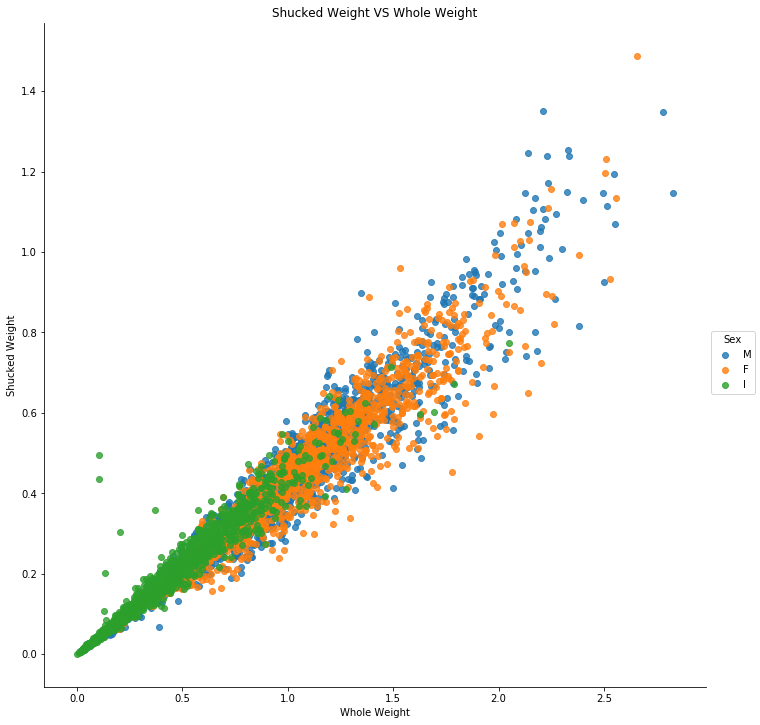

In [15]:
sns.lmplot("Whole Weight", "Shucked Weight", data=df, hue='Sex', fit_reg=False, size=10)
ax = plt.gca()
ax.set_title("Shucked Weight VS Whole Weight")

In the bottom left it seems we have some infants whose shucked weight is greater than the whole weight. 
We can get the exact rows using the formula below

In [16]:
df[df['Shucked Weight'] > df['Whole Weight']]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1216,I,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400,5.0
2627,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5.0
2641,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7.0
3086,I,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,7.0


Lets remove these rows

In [17]:
df.drop(df.index[df['Shucked Weight'] > df['Whole Weight']], inplace=True)

In [18]:
df.shape

(4167, 9)

Text(0.5,1,'Box Plot')

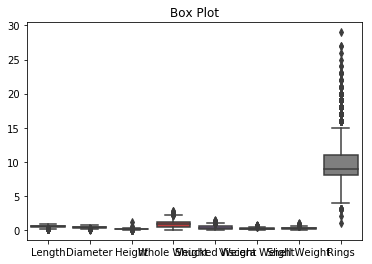

In [19]:
sns.boxplot(data=df).set_title("Box Plot")

Text(0.5,1,'Box Plot For Rings')

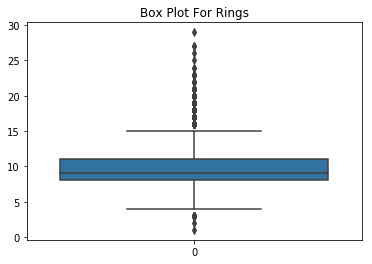

In [20]:
sns.boxplot(data=df['Rings']).set_title("Box Plot For Rings")

In [21]:
df.drop(df.index[(df['Rings'] > 15) | (df['Rings'] < 4)], inplace=True)

In [22]:
df.shape

(3889, 9)

### Scatter Plot

c:\users\el-davo\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\el-davo\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
c:\users\el-davo\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\el-davo\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


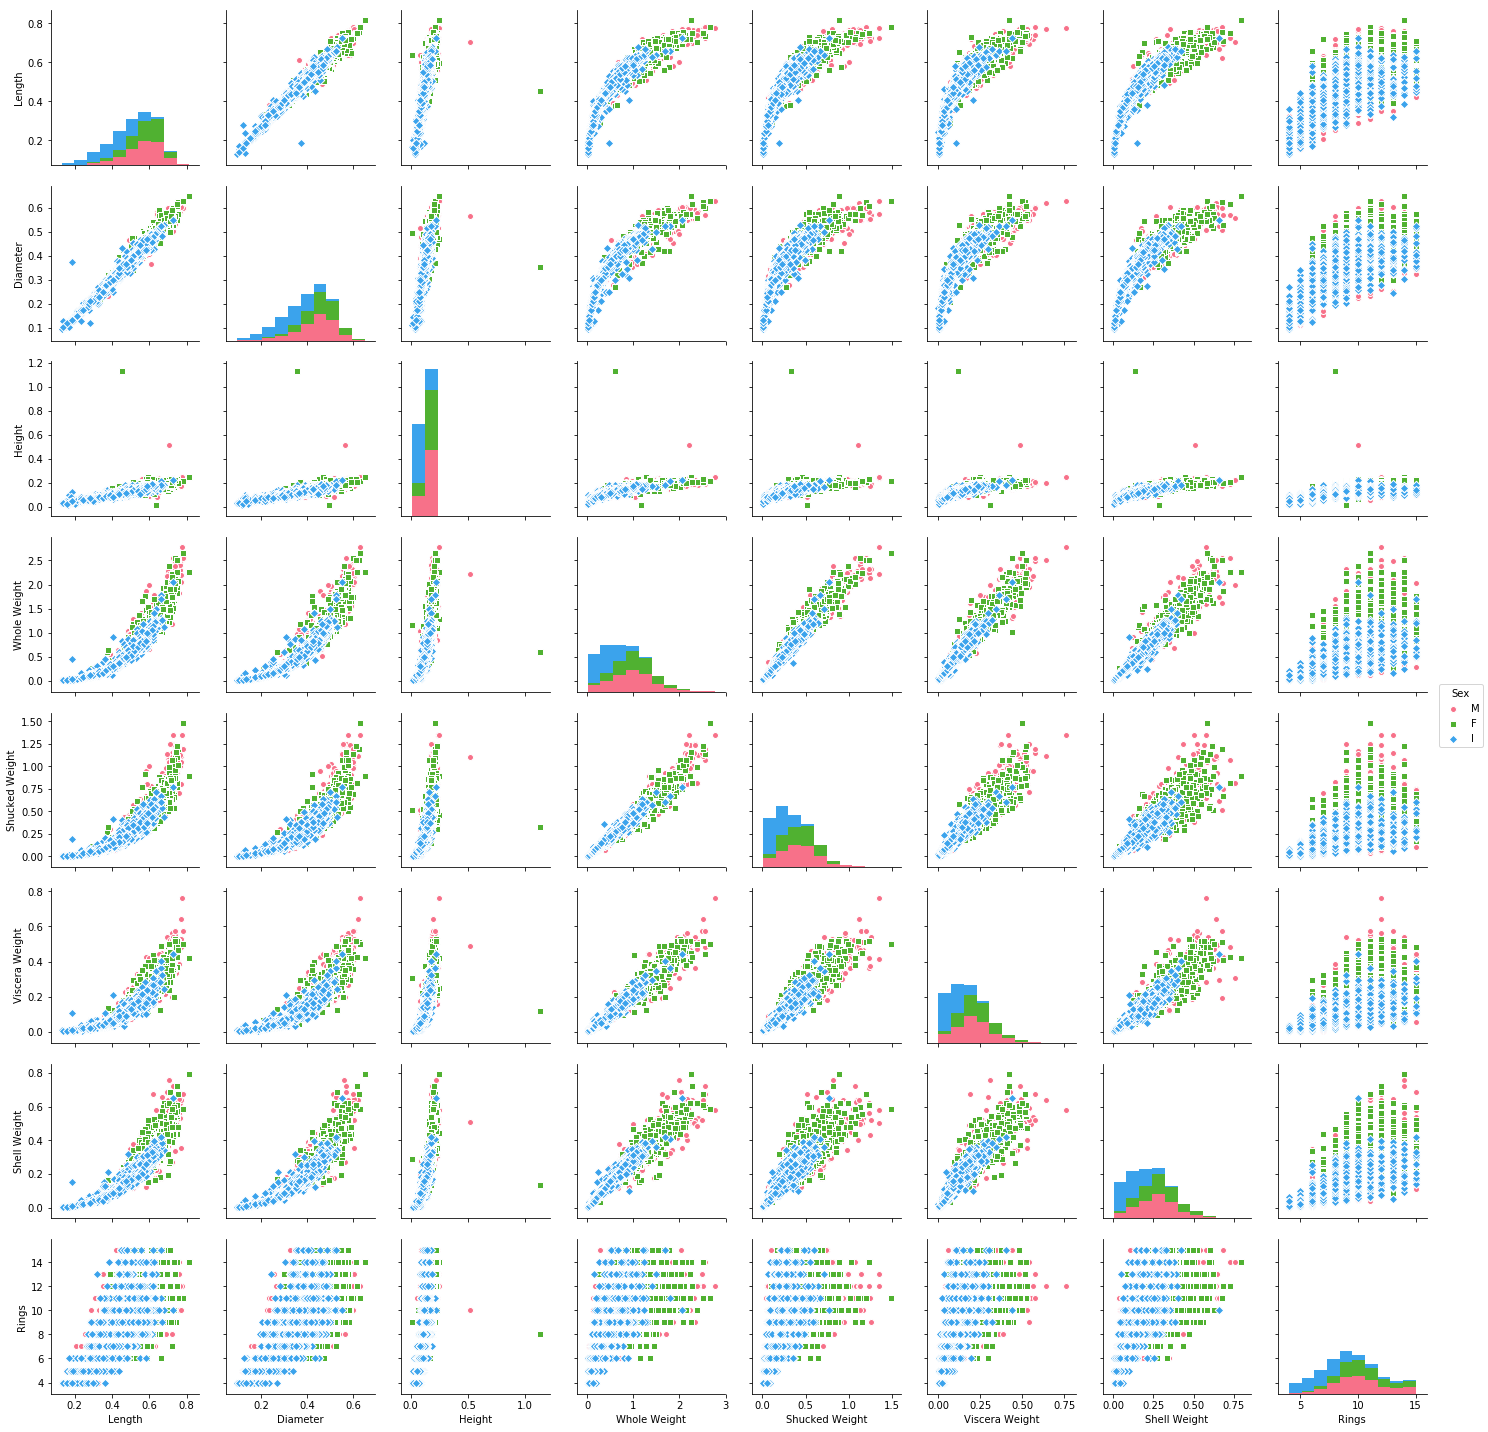

In [23]:
sns.pairplot(df, hue="Sex", palette="husl", markers=["o", "s", "D"])

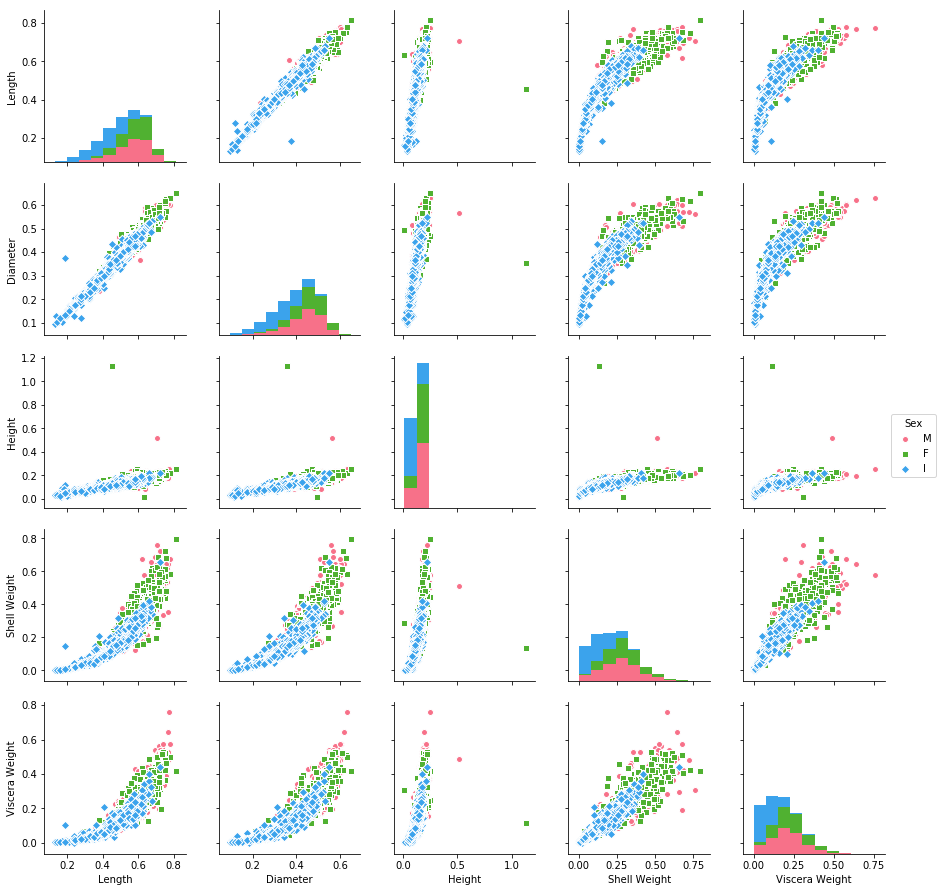

In [24]:
sns.pairplot(df[['Sex', 'Length', 'Diameter', 'Height', 'Shell Weight', 'Viscera Weight']], hue="Sex", palette="husl", markers=["o", "s", "D"])

In [25]:
#corr = df[['Sex', 'Length', 'Diameter', 'Height', 'Shell Weight', 'Viscera Weight']].corr()
#c1 = corr.abs().unstack()
#c1.sort_values(ascending = False)

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']], 20))

Correlation Matrix
                  Length  Diameter    Height  Whole Weight  Shucked Weight  \
Length          1.000000  0.986707  0.821522      0.928790        0.902589   
Diameter        0.986707  1.000000  0.826825      0.927706        0.897418   
Height          0.821522  0.826825  1.000000      0.814177        0.778027   
Whole Weight    0.928790  0.927706  0.814177      1.000000        0.976052   
Shucked Weight  0.902589  0.897418  0.778027      0.976052        1.000000   
Viscera Weight  0.905629  0.901327  0.796245      0.968567        0.935278   
Shell Weight    0.916250  0.922502  0.819495      0.962913        0.907084   
Rings           0.618564  0.633749  0.580825      0.575428        0.490953   

                Viscera Weight  Shell Weight     Rings  
Length                0.905629      0.916250  0.618564  
Diameter              0.901327      0.922502  0.633749  
Height                0.796245      0.819495  0.580825  
Whole Weight          0.968567      0.962913  0.57